# Colaeta dos Dados 

Os dados utilizados foram retirados de uma base de dados do Kaggle, que pode ser encontrada neste link: https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018/data. Ela se Chama MLB Pitch data 2015-2019, e contém os dados de todos os arremessos dessas 5 Temporadas. Dentro da base de dados existiam mais dados acerca de rebatidas porém foi utilizado somente o dos arremessos

# Sobre os dados
|Campo|Descrição|
|:-|:-|
|px| Posiçao da bola no eixo x em relação ao homeplate |
|pz| Posiçao da bola no eixo y em relação ao homeplate |
|start_speed| Velocidade inicial|
|end_speed| Velocidade final|
|spin_rate| Rotações por minuto da bola|
|spin_dir| Direçao da Rotação da bola|
|break_angle| Ângulo da quebra da bola|
|break-lenght| Comprimento da quebra|
|break_y| Quebra no eixo y|
|ax| Aceleração do arremesso no eixo x|
|ay| Aceleração do arremesso no eixo y|
|az| Aceleração do arremesso no eixo z|
|sz_top| Distância entre o chão e o topo da zona de strike do rebatedor |
|sz_bot| Distância entre o chão e o final da zona de strike do rebatedor |
|type_confidenca| O peso no nó de saída do algoritmo de classificação correspondente ao tipo de pitch mais provável |
|vx0| Velocidade inicial do arremesso no eixo x |
|vy0| Velocidade inicial do arremesso no eixo y |
|vz0| Velocidade inicial do arremesso no eixo z |
|x| A localização horizontal do arremesso ao cruzar a home plate |
|x0| A localizacão horizontal inicial do arremesso |
|y| A localização vertical do arremesso ao cruzar a home plate |
|y0| a distância em pés da base onde o sistema PITCHf/x está configurado para medir os parâmetros iniciais. |
|z0| A altura inicial do arremesso|
|pfx_x|O movimento horizontal do arremesso entre o ponto inicial e a homeplate |
|pfx_z|O movimento vertical do arremesso entre o ponto inicial e a homeplate |
|nasty|Sem informação exata |
|zone| Se foi ou não dentro da zona de strike
|code| Ação da jogada |
|type| Ação da jogada|
|pitch_type| Tipo de Arremesso |
|event_num| Número de eventos |
|b_score| Número de caminhadas
|ab_id| Id do Rebatedor |
|b_count| Contagem de bolas|
|s_count| Contagem de strikes|
|outs| Contagem de foras|
|pitch_num| Número de arremessos|
|on_1b| Se chegou na primeira base|
|on_2b|Se chegou na segunda base|
|on_3b|Se chegou na terceira base|

**OBJETIVO:** Os Arremessos são um dos pontos centrais no baseball, o objetivo deste material é utilizar destes dados e realizar uma regressão, de uma forma a compreender como esses dados podem ajudar a entender o que mais ajuda a conseguir um strike, que é a variável resposta

In [127]:
import pandas as pd

In [128]:
#Carregando a base de dados
df_pitches = pd.read_csv('2019_pitches.csv')

In [129]:
df_pitches.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.00,2.15,88.8,80.7,placeholder,placeholder,22.8,4.8,24.0,-8.47,...,5,0.0,2.019000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.34,2.31,89.9,81.8,placeholder,placeholder,22.8,3.6,24.0,-7.10,...,8,0.0,2.019000e+09,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.05,2.03,85.7,79.6,placeholder,placeholder,9.6,6.0,24.0,3.65,...,9,0.0,2.019000e+09,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,0.49,0.92,85.4,78.5,placeholder,placeholder,24.0,7.2,24.0,-13.77,...,10,0.0,2.019000e+09,0.0,1.0,1.0,3.0,0.0,0.0,0.0
4,-0.13,1.11,84.6,77.6,placeholder,placeholder,26.4,8.4,24.0,-15.99,...,11,0.0,2.019000e+09,1.0,1.0,1.0,4.0,0.0,0.0,0.0


In [130]:
df_pitches.dtypes

px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate           object
spin_dir            object
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence     object
vx0                float64
vy0                float64
vz0                float64
x                   object
x0                 float64
y                   object
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone                object
code                object
type                object
pitch_type          object
event_num            int64
b_score            float64
ab_id              float64
b_count            float64
s_count            float64
outs               float64
pitch_num          float64
o

In [131]:
#Selecionando as variáveis
variaveis = [['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'break_angle', 'break_lenght', 'break_y',
             'zone', 'pitch_type', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b']]

In [132]:
df_pitches1 = df_pitches[['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'break_angle', 'break_length', 'break_y',
             'zone', 'pitch_type', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'ab_id']]

In [134]:
df_pitches1.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,zone,pitch_type,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,ab_id
0,0.00,2.15,88.8,80.7,placeholder,placeholder,22.8,4.8,24.0,placeholder,FF,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.019000e+09
1,0.34,2.31,89.9,81.8,placeholder,placeholder,22.8,3.6,24.0,placeholder,FF,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.019000e+09
2,-0.05,2.03,85.7,79.6,placeholder,placeholder,9.6,6.0,24.0,placeholder,SL,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.019000e+09
3,0.49,0.92,85.4,78.5,placeholder,placeholder,24.0,7.2,24.0,placeholder,CH,0.0,1.0,1.0,3.0,0.0,0.0,0.0,2.019000e+09
4,-0.13,1.11,84.6,77.6,placeholder,placeholder,26.4,8.4,24.0,placeholder,CH,1.0,1.0,1.0,4.0,0.0,0.0,0.0,2.019000e+09


# Limpando os dados

In [135]:
df_pitches1.isnull().sum()

px              6629
pz              6629
start_speed     6629
end_speed       6629
spin_rate       6629
spin_dir        6629
break_angle     6629
break_length    6629
break_y         6629
zone            6629
pitch_type      6629
b_count            0
s_count            0
outs               0
pitch_num          0
on_1b              0
on_2b              0
on_3b              0
ab_id              0
dtype: int64

In [136]:
df_pitches1.dropna(inplace = True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6900\1464123289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitches1.dropna(inplace = True)


In [137]:
df_pitches1.isnull().sum()

px              0
pz              0
start_speed     0
end_speed       0
spin_rate       0
spin_dir        0
break_angle     0
break_length    0
break_y         0
zone            0
pitch_type      0
b_count         0
s_count         0
outs            0
pitch_num       0
on_1b           0
on_2b           0
on_3b           0
ab_id           0
dtype: int64

# Criando Variáveis

In [138]:
#Número de Strikes (2.0) = 11055
df_pitches1.s_count.value_counts()

0.0    605782
1.0    105324
2.0     11055
Name: s_count, dtype: int64

In [64]:
#Número de walks (4.0) = 50722
df_pitches1.b_count.value_counts()

0.0    337754
1.0    216133
2.0    117546
3.0     50722
Name: b_count, dtype: int64

In [139]:
#Existia um outlier com valor 4, coisa que não existe
df_pitches1.drop(df_pitches1[df_pitches1['b_count'] == 4].index, inplace = True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6900\2471829497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitches1.drop(df_pitches1[df_pitches1['b_count'] == 4].index, inplace = True)


In [140]:
#Fazendo uma coluna indicando quando se teve um strikeout
df_pitches1['strikeout'] = (df_pitches1['s_count'] == 2.0).astype(int)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6900\3402060700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitches1['strikeout'] = (df_pitches1['s_count'] == 2.0).astype(int)


In [141]:
#Fazendo uma coluna indicando quando se teve um walk
df_pitches1['walk'] = (df_pitches1['b_count'] == 3.0).astype(int)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6900\3852962727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitches1['walk'] = (df_pitches1['b_count'] == 3.0).astype(int)


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vizualização dos Dados e Análise Exploratória

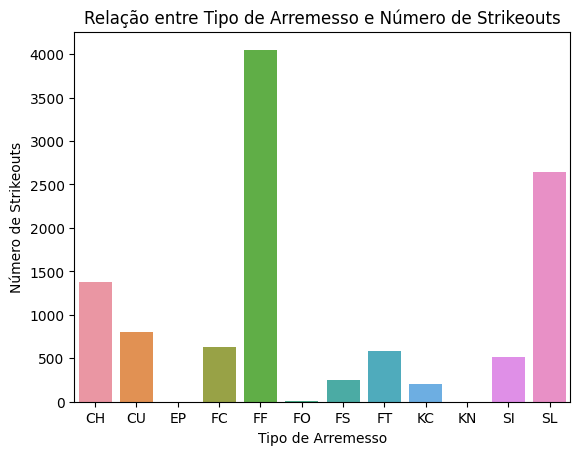

In [146]:
# Agrupando por tipo de arremesso e calculando a contagem de strikeouts
contagem_strikeouts = df_pitches1.groupby('pitch_type')['strikeout'].sum().reset_index()

# Crie um gráfico de dispersão
sns.barplot(x='pitch_type', y='strikeout', data=contagem_strikeouts)

# Adicione rótulos ao gráfico
plt.xlabel('Tipo de Arremesso')
plt.ylabel('Número de Strikeouts')
plt.title('Relação entre Tipo de Arremesso e Número de Strikeouts')

plt.show()

In [147]:
df_pitches1.strikeout.value_counts()

0    711105
1     11055
Name: strikeout, dtype: int64

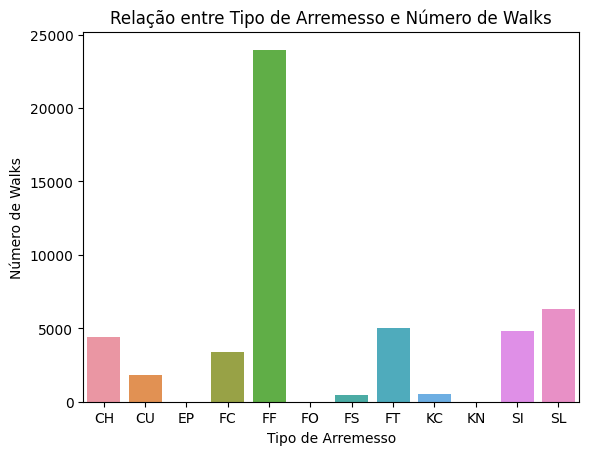

In [148]:
# Agrupando por tipo de arremesso e calculando a contagem de walks
contagem_walks = df_pitches1.groupby('pitch_type')['walk'].sum().reset_index()

# Crie um gráfico de dispersão
sns.barplot(x='pitch_type', y='walk', data=contagem_walks)

# Adicione rótulos ao gráfico
plt.xlabel('Tipo de Arremesso')
plt.ylabel('Número de Walks')
plt.title('Relação entre Tipo de Arremesso e Número de Walks')

plt.show()

In [149]:
df_pitches1.walk.value_counts()

0    671437
1     50723
Name: walk, dtype: int64

## Teste de variáveis para o modelo

In [150]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [151]:
df_treino, df_teste = train_test_split(df_pitches1, test_size=0.3, random_state=42)

In [152]:
# Testando as melhores variáveis que levam ao strikeout
y, x = patsy.dmatrices('strikeout ~ px + pz + start_speed + end_speed + spin_rate + spin_dir + break_angle + break_length + break_y + C(zone) + C(pitch_type) + b_count + s_count + outs + pitch_num + on_1b + on_2b + on_3b', data = df_treino)

In [153]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              strikeout   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     9631.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:49:11   Log-Likelihood:             4.3376e+05
No. Observations:              505512   AIC:                        -8.675e+05
Df Residuals:                  505489   BIC:                        -8.672e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.373e+07   1.06e+08      0.130      0.897   -1.94e+08    2.21e+08
C(pitch_type)[T.CU]     0.0005      0.001      0.538      0.590      -0.001       0.002
C(pitch_type)[T.EP]    -0.0203      0.019     -1.045      0.296      -0.058       0.018
C(pitch_type)[T.FC]    -0.0001      0.001     -0.168      0.866      -0.002       0.001
C(pitch_type)[T.FF]    -0.0008      0.001     -1.066      0.287      -0.002       0.001
C(pitch_type)[T.FO]     0.0518      0.019      2.670      0.008       0.014       0.090
C(pitch_type)[T.FS]    -0.0002      0.001     -0.194      0.846      -0.003       0.002
C(pitch_type)[T.FT]    -0.0003      0.001     -0.330      0.741      -0.002       0.001
C(pitch_type)[T.KC]  7.501e-05      0.001      0.060      0.952      -0.002       0.003
C(pitch_type)[T.KN]    -0.0055      0.009     -0.616      0.538      -0.023       0.012
C(pitch_type)[T.SI]     0.0003      0.001      0.389      0.697      -0.001       0.002
C(pitch_type)[T.SL]     0.0008      0.001      1.225      0.220      -0.000       0.002
px                   7.216e-05      0.000      0.416      0.677      -0.000       0.000
pz                      0.0005      0.000      3.090      0.002       0.000       0.001
start_speed            -0.0004      0.000     -1.765      0.078      -0.001    4.58e-05
end_speed               0.0004      0.000      1.772      0.076   -4.58e-05       0.001
break_angle          5.013e-05   1.91e-05      2.630      0.009    1.28e-05    8.75e-05
break_length           -0.0002      0.000     -1.513      0.130      -0.000    6.38e-05
break_y             -5.722e+05   4.41e+06     -0.130      0.897   -9.22e+06    8.08e+06
b_count                 0.0053      0.000     20.775      0.000       0.005       0.006
s_count                 0.1644      0.000    440.219      0.000       0.164       0.165
outs                    0.0002      0.000      1.052      0.293      -0.000       0.001
pitch_num              -0.0060      0.000    -41.956      0.000      -0.006      -0.006
on_1b                        0          0        nan        nan           0           0
on_2b                        0          0        nan        nan           0           0
on_3b                        0          0        nan        nan           0           0
==============================================================================
Omnibus:                   454778.970   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19689948.350
Skew:                           4.289   Prob(JB):                         0.00
Kurtosis:                      32.347   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

In [154]:
# Retirando variáveis a partir do p-value
y, x = patsy.dmatrices('strikeout ~  pz + start_speed + end_speed + break_angle + break_length  + b_count + s_count + pitch_num', data = df_treino)

In [155]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              strikeout   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                 2.648e+04
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:49:23   Log-Likelihood:             4.3375e+05
No. Observations:              505512   AIC:                        -8.675e+05
Df Residuals:                  505503   BIC:                        -8.674e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0004      0.005     -0.084      0.933      -0.011       0.010
pz               0.0005      0.000      2.738      0.006       0.000       0.001
start_speed     -0.0005      0.000     -2.055      0.040      -0.001   -2.16e-05
end_speed        0.0005      0.000      2.059      0.040    2.36e-05       0.001
break_angle   4.196e-05   1.51e-05      2.773      0.006    1.23e-05    7.16e-05
break_length   -9.2e-05      0.000     -0.888      0.374      -0.000       0.000
b_count          0.0052      0.000     20.800      0.000       0.005       0.006
s_count          0.1644      0.000    440.994      0.000       0.164       0.165
pitch_num       -0.0060      0.000    -42.117      0.000      -0.006      -0.006
==============================================================================
Omnibus:                   454794.080   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19692050.315
Skew:                           4.289   Prob(JB):                         0.00
Kurtosis:                      32.348   Cond. No.                     4.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
import numpy as np

In [157]:
# Retirando variáveis a partir do p-value
y, x = patsy.dmatrices('strikeout ~ pitch_type + pz + start_speed + end_speed + break_angle + break_length  + b_count + s_count + pitch_num', data = df_treino)

In [158]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              strikeout   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:49:45   Log-Likelihood:             4.3376e+05
No. Observations:              505512   AIC:                        -8.675e+05
Df Residuals:                  505492   BIC:                        -8.672e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6.745e-06      0.006     -0.001      0.999      -0.011       0.011
pitch_type[T.CU]     0.0005      0.001      0.561      0.575      -0.001       0.002
pitch_type[T.EP]    -0.0202      0.019     -1.039      0.299      -0.058       0.018
pitch_type[T.FC]    -0.0001      0.001     -0.171      0.865      -0.002       0.001
pitch_type[T.FF]    -0.0008      0.001     -1.098      0.272      -0.002       0.001
pitch_type[T.FO]     0.0518      0.019      2.670      0.008       0.014       0.090
pitch_type[T.FS]    -0.0003      0.001     -0.210      0.834      -0.003       0.002
pitch_type[T.FT]    -0.0003      0.001     -0.378      0.705      -0.002       0.001
pitch_type[T.KC]  8.451e-05      0.001      0.068      0.946      -0.002       0.003
pitch_type[T.KN]    -0.0054      0.009     -0.611      0.541      -0.023       0.012
pitch_type[T.SI]     0.0003      0.001      0.347      0.728      -0.001       0.002
pitch_type[T.SL]     0.0008      0.001      1.256      0.209      -0.000       0.002
pz                   0.0005      0.000      3.045      0.002       0.000       0.001
start_speed         -0.0004      0.000     -1.719      0.086      -0.001    5.66e-05
end_speed            0.0004      0.000      1.742      0.081   -5.29e-05       0.001
break_angle       4.956e-05   1.91e-05      2.601      0.009    1.22e-05    8.69e-05
break_length        -0.0002      0.000     -1.496      0.135      -0.000    6.63e-05
b_count              0.0052      0.000     20.769      0.000       0.005       0.006
s_count              0.1644      0.000    440.426      0.000       0.164       0.165
pitch_num           -0.0060      0.000    -41.961      0.000      -0.006      -0.006
==============================================================================
Omnibus:                   454780.221   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19690134.571
Skew:                           4.289   Prob(JB):                         0.00
Kurtosis:                      32.347   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
reg = smf.ols('strikeout ~ pitch_type + pz + start_speed + end_speed + break_angle + break_length  + b_count + s_count + pitch_num', data = df_treino).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              strikeout   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:49:49   Log-Likelihood:             4.3376e+05
No. Observations:              505512   AIC:                        -8.675e+05
Df Residuals:                  505492   BIC:                        -8.672e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6.745e-06      0.006     -0.001      0.999      -0.011       0.011
pitch_type[T.CU]     0.0005      0.001      0.561      0.575      -0.001       0.002
pitch_type[T.EP]    -0.0202      0.019     -1.039      0.299      -0.058       0.018
pitch_type[T.FC]    -0.0001      0.001     -0.171      0.865      -0.002       0.001
pitch_type[T.FF]    -0.0008      0.001     -1.098      0.272      -0.002       0.001
pitch_type[T.FO]     0.0518      0.019      2.670      0.008       0.014       0.090
pitch_type[T.FS]    -0.0003      0.001     -0.210      0.834      -0.003       0.002
pitch_type[T.FT]    -0.0003      0.001     -0.378      0.705      -0.002       0.001
pitch_type[T.KC]  8.451e-05      0.001      0.068      0.946      -0.002       0.003
pitch_type[T.KN]    -0.0054      0.009     -0.611      0.541      -0.023       0.012
pitch_type[T.SI]     0.0003      0.001      0.347      0.728      -0.001       0.002
pitch_type[T.SL]     0.0008      0.001      1.256      0.209      -0.000       0.002
pz                   0.0005      0.000      3.045      0.002       0.000       0.001
start_speed         -0.0004      0.000     -1.719      0.086      -0.001    5.66e-05
end_speed            0.0004      0.000      1.742      0.081   -5.29e-05       0.001
break_angle       4.956e-05   1.91e-05      2.601      0.009    1.22e-05    8.69e-05
break_length        -0.0002      0.000     -1.496      0.135      -0.000    6.63e-05
b_count              0.0052      0.000     20.769      0.000       0.005       0.006
s_count              0.1644      0.000    440.426      0.000       0.164       0.165
pitch_num           -0.0060      0.000    -41.961      0.000      -0.006      -0.006
==============================================================================
Omnibus:                   454780.221   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19690134.571
Skew:                           4.289   Prob(JB):                         0.00
Kurtosis:                      32.347   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Avaliando na base de Testes

In [160]:
#avaliando na base de teste.

y_pred = reg.predict(df_teste[['pz', 'start_speed', 'end_speed','break_angle', 'break_length',
              'pitch_type', 'b_count', 's_count', 'pitch_num'
]])

r2_ajustado = r2_score(df_teste['strikeout'], y_pred)
print(f'R-quadrado ajustado: {r2_ajustado:.2%}')

R-quadrado ajustado: 30.05%


# Conclusões

-  R2 foi bem baixo, então conclui-se que essas variáveis não são o suficiente para fazer um melhor modelo preditivo;
- Dito isto, somente foi utilizado uma parte do data-set original, então provavelemnte as outras partes do "quebra-cabeças" estão nessa outra parte que contém os rebatedores;
- Apesar disso, as variáveis escolhidas apresenaram um a certa influência dentro do modelo, precisando apenas de mais ajuda de outras variáveis